In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 📚 assignments

## assignment 1
Dataframe Formatting

In [2]:
hotels = pd.read_excel('./data/HotelCustomersDataset.xlsx')

hotels['date'] = (
    pd.to_datetime('2018-12-31')
    - pd.to_timedelta(hotels['DaysSinceCreation'], unit='D')
).astype('datetime64[ns]')

daily_revenue = (
    hotels
    .groupby('date')
    .agg({'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'})
)
monthly_revenue = daily_revenue.resample('M').sum()
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


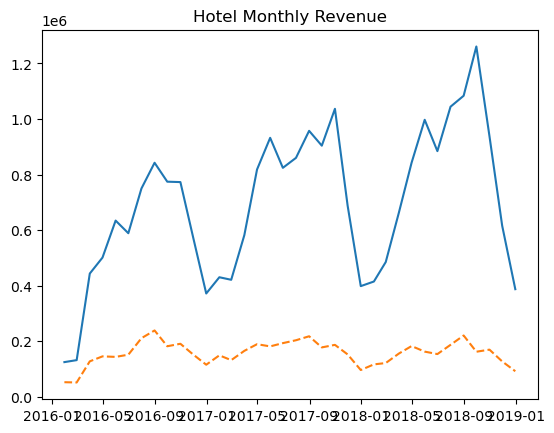

In [3]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'])
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'], linestyle='--')
ax.set_title('Hotel Monthly Revenue');

## assignment 2
Chart Formatting

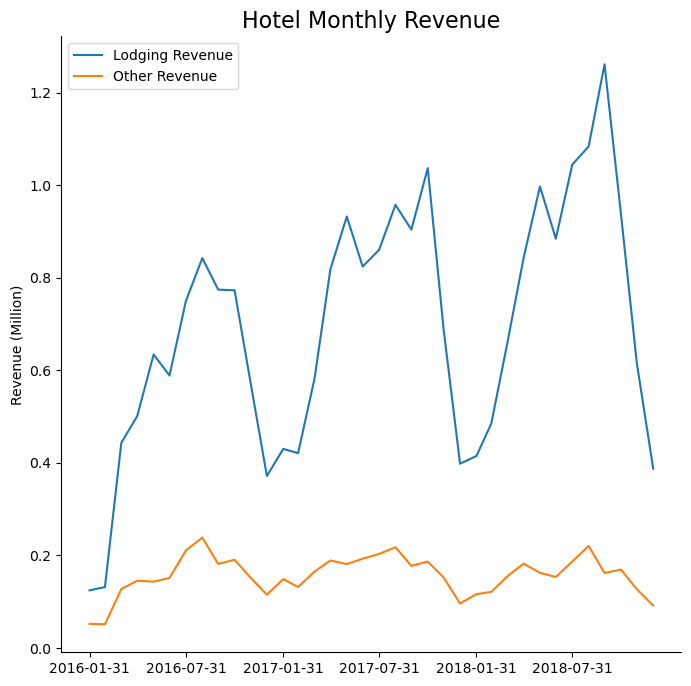

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(
    monthly_revenue.index,
    monthly_revenue['LodgingRevenue'] / 1000000,
    label='Lodging Revenue'
)

ax.plot(
    monthly_revenue.index,
    monthly_revenue['OtherRevenue'] / 1000000,
    label='Other Revenue'
)

ax.legend(loc='upper left')

ax.set_title('Hotel Monthly Revenue', fontsize=16)
ax.set_ylabel('Revenue (Million)')
ax.set_xticks(monthly_revenue.index[::6])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);